In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

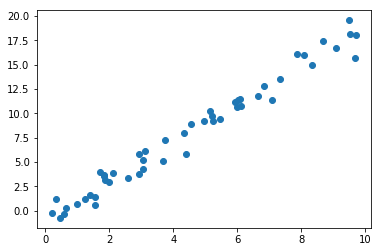

In [4]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)

plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression(fit_intercept=True)

In [8]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
y.shape

(50,)

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311146

In [15]:
xfit = np.linspace(-1, 11)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

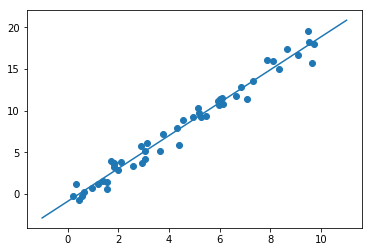

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [18]:
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [21]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [22]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [23]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
model = make_pipeline(Imputer(strategy='mean'), 
                      PolynomialFeatures(degree=2), 
                      LinearRegression())

In [28]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [29]:
print(y)

[14 16 -1  8 -5]


In [31]:
print(model.predict(X))

[14. 16. -1.  8. -5.]


In [32]:
import seaborn as sns
sns.set()

In [33]:
from sklearn.datasets import make_blobs

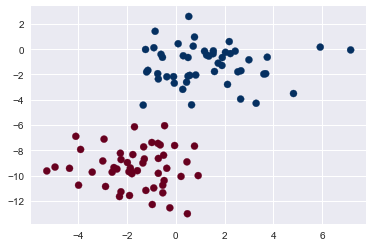

In [34]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None)

In [37]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

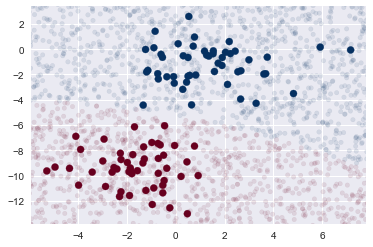

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [39]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [40]:
from sklearn.datasets import make_blobs

In [41]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

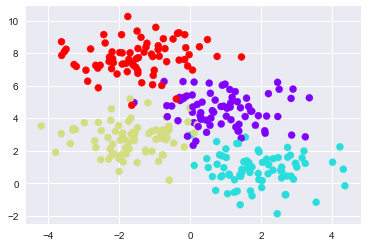

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree = DecisionTreeClassifier().fit(X, y)

In [45]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


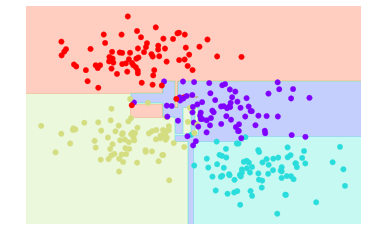

In [49]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [50]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

A Jupyter Widget